<a href="https://colab.research.google.com/github/subhashpolisetti/Automated-ML-with-PyCaret/blob/main/Time_Series_Forecasting_Univariate_Without_Exogenous_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting: Univariate Without Exogenous Variables

This notebook demonstrates univariate time series forecasting using the PyCaret library. We utilize the **Air Passengers** dataset, which contains monthly totals of international airline passengers from 1949 to 1960.

The objective is to forecast the number of passengers for the next 12 months without using exogenous variables.

## Key Steps:
1. **Data Loading**: Import the Air Passengers dataset and parse the dates.
2. **Setup PyCaret**: Initialize the time series forecasting environment in PyCaret.
3. **Model Comparison**: Compare multiple time series forecasting models to identify the best one.
4. **Model Creation**: Create the best-performing model based on the comparison.
5. **Predictions**: Generate forecasts for the next 12 months.
6. **Performance Evaluation**: Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE) to evaluate model performance.
7. **Visualization**: Plot actual vs predicted values, residuals, and perform ACF/PACF analysis.
8. **Save the Model**: Save the trained model for future use.

This notebook serves as a practical guide to implementing time series forecasting in Python using PyCaret.


In [11]:

!pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 78.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# Import necessary libraries
import pandas as pd
from pycaret.time_series import *


In [2]:
# Load the Air Passengers dataset
dataset_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
air_passengers_data = pd.read_csv(dataset_url, parse_dates=['Month'], index_col='Month')


In [3]:
# Set up PyCaret for time series forecasting
time_series_setup = setup(air_passengers_data, target='Passengers', session_id=123)


,Description,Value
0,session_id,123
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(143, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [4]:
# Compare different time series forecasting models
best_time_series_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
ets,ETS,0.2426,0.2136,7.7515,7.7515,0.0172,0.0174,0.1767
exp_smooth,Exponential Smoothing,0.2435,0.2144,7.7809,7.7809,0.0172,0.0175,1.0967
stlf,STLF,0.2793,0.2460,8.9481,8.9481,0.0217,0.0213,0.0733
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.3408,0.3002,10.9141,10.9141,0.0261,0.0258,0.2000
arima,ARIMA,0.3620,0.3189,11.5951,11.5951,0.0278,0.0274,0.1300
auto_arima,Auto ARIMA,0.4086,0.3598,13.0787,13.0787,0.0309,0.0304,7.7233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.4515,0.3976,14.4549,14.4549,0.0343,0.0336,0.4967
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.4713,0.4149,15.0691,15.0691,0.0345,0.0342,0.3067
theta,Theta Forecaster,0.5020,0.4418,16.0228,16.0228,0.0346,0.0344,0.0500
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5077,0.4470,16.2285,16.2285,0.0367,0.0366,0.2067


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [5]:
# Create the best model
final_time_series_model = create_model(best_time_series_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,1960-08,0.0550,0.0484,1.7512,1.7512,0.0034,0.0035
1,1960-09,0.5642,0.4967,18.0144,18.0144,0.0391,0.0399
2,1960-10,0.1087,0.0958,3.4890,3.4890,0.0089,0.0089
Mean,NaT,0.2426,0.2136,7.7515,7.7515,0.0172,0.0174
SD,NaT,0.2284,0.2011,7.2915,7.2915,0.0157,0.0160


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
# Make predictions for the next 12 months
predicted_future_passengers = predict_model(final_time_series_model, fh=12)

In [9]:
# Calculate performance metrics
# Split the data into training and testing sets
train_data = air_passengers_data.iloc[:-12]
test_data = air_passengers_data.iloc[-12:]

In [10]:
# Fit the final model on the training data
final_time_series_model = create_model(best_time_series_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,1960-08,0.0550,0.0484,1.7512,1.7512,0.0034,0.0035
1,1960-09,0.5642,0.4967,18.0144,18.0144,0.0391,0.0399
2,1960-10,0.1087,0.0958,3.4890,3.4890,0.0089,0.0089
Mean,NaT,0.2426,0.2136,7.7515,7.7515,0.0172,0.0174
SD,NaT,0.2284,0.2011,7.2915,7.2915,0.0157,0.0160


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
# Generate predictions for the test set
test_predictions = predict_model(final_time_series_model, fh=len(test_data))

In [14]:
# Inspect the output of test_predictions to find the correct column for predictions
print(test_predictions.head())  # Check the structure of the predictions output

           y_pred
1960-12  432.3157
1961-01  445.5273
1961-02  418.4893
1961-03  464.8099
1961-04  494.6925


In [15]:
# If predictions are stored under a different column, replace 'Prediction' with the correct column name.
# For example, if it's stored as 'y_pred' or similar, adjust as necessary.
if 'y_pred' in test_predictions.columns:
    prediction_column = 'y_pred'
else:
    prediction_column = 'Prediction'  # Fallback to default if needed

In [18]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 48.321025
Mean Squared Error: 4099.5690628141665


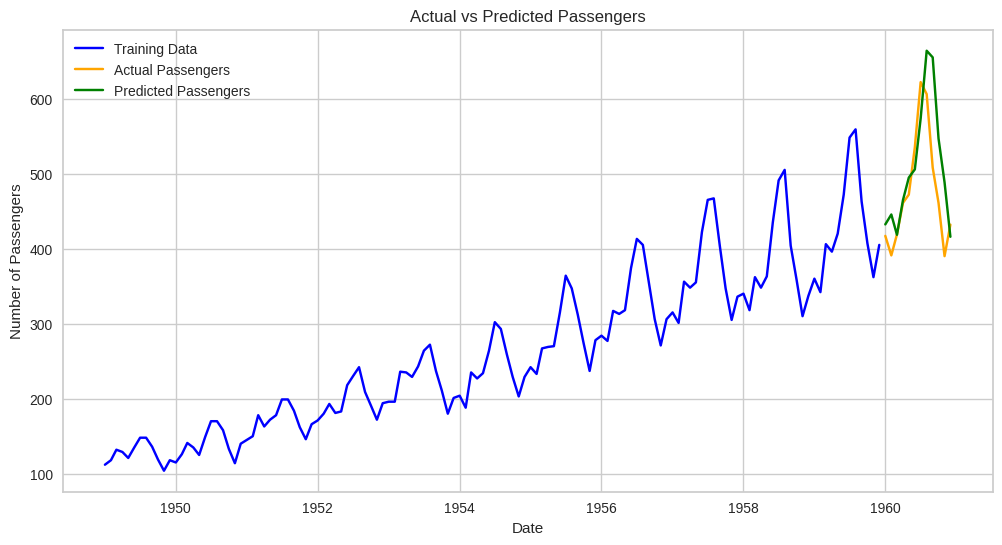

In [19]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Passengers'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Passengers'], label='Actual Passengers', color='orange')
plt.plot(test_data.index, test_predictions[prediction_column], label='Predicted Passengers', color='green')
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [21]:
# Save the trained model
model_file_path = 'final_time_series_model'
save_model(final_time_series_model, model_file_path)

print(f'Model saved as {model_file_path}.pkl')


Transformation Pipeline and Model Successfully Saved
Model saved as final_time_series_model.pkl
